In [31]:
import pandas as pd
import numpy as np
from haversine import haversine, Unit
import random, sys, time, math
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')


In [32]:
class ACO():
    def __init__(self):
        self.y = []
        self.z = []

    def calculate_distance(self, paths):
        total_distance = 0;
        x = paths[0]
        for p in range(len(paths)): 
            i = paths[p]
            total_distance += _distance[x][i]
            if verbose:
                print(x, i, _distance[x][i], total_distance)
            x = i

        if verbose:
            print(total_distance)
        return total_distance
    

    def Fit(self, distance, nk=10, maxIterations=100, beta=2, zeta=0.1, rho=0.2, q0=0.7, plot=False, verbose=False):
        _distance = distance 
        X = distance[0]
        Y = X
        
        # initial phemorone
        total_distance = 0;
        x = 0
        for i in range(len(X)):    
            total_distance += _distance[x][i]
            x = i

        _pheromoneInitialValue = 1/total_distance
        if verbose:
            print(total_distance, _pheromoneInitialValue)
            print()

        _pheromone = []        
        for x in X:      
            result = [_pheromoneInitialValue for y in Y]
            _pheromone.append(result)

        if depot == -1: # start from random node
            _depot = random.sample(range(0, len(df1)), nk)
        else:
            _depot = [depot] * nk 

        if verbose:
            print('_depot')
            print(_depot)
            print()

        
        best_paths = []
        best_distance = sys.float_info.max

        start_time_process = time.time()


        for it in range(maxIterations):
            best_current_paths = []

            best_current_distance = sys.float_info.max


            total_node = 1
            exist = []
            for ant in range(nk):
                if verbose:
                    print()
                    print("Semut", ant, " ... ", _depot[ant])

                paths = []
                exist = [] 
                _from = _depot[ant]
                paths.append(_depot[ant])
                exist.append(_depot[ant])


                while len(paths) < len(df1):    
                    # get all node not visited yet
                    _posibleNode = []
                    for i in range(len(X)):
                        _exist = False
                        for x in exist:
                            if i == x:
                                _exist = True
                        if not _exist:
                            _posibleNode.append(i)     
                    _q0 = np.random.randn()
                    if _q0 <= q0:
                        # get by heuristic 
                        if verbose:
                            print("heuristic")

                        shortTransition = sys.float_info.max
                        __to = -1
                        for p in _posibleNode:
                            distanceValue = _distance[_from][p]
                            pheromoneValue = _pheromone[_from][p]
                            transitionValue = (1/pheromoneValue) * math.pow(distanceValue, beta)
                            if verbose:
                                print(_from, p, distanceValue, pheromoneValue, transitionValue)
                            if shortTransition > transitionValue:
                                shortTransition = transitionValue
                                _to = p

                        paths.append(_to)
                        exist.append(_to)
                        if verbose:
                            print('next: ', _to)  
                    else:    
                        # get by random
                        if verbose:
                            print("random")
                        _to = random.randint(0, len(df)) 
                        while _to in exist:
                            _to = random.randint(0, len(df)) 
                        paths.append(_to)
                        exist.append(_to)

                        if verbose:
                            print('next: ', _to)

                    # Apply local pheromone updating
                    pheromoneValue = _pheromone[_from][_to]
                    tau = (( 1 - zeta) * pheromoneValue) + _pheromoneInitialValue
                    _pheromone[_from][_to] = tau
                    _pheromone[_to][_from] = tau

                    _from = _to

                    if verbose:
                        print(paths)
                        print()

                distance = self.calculate_distance(paths)

                if best_current_distance > distance:
                    best_current_distance = distance 
                    best_current_paths = paths



            if best_distance > best_current_distance:
                best_distance = best_current_distance
                best_paths = best_current_paths

            self.y.append(best_distance)
            self.z.append(best_current_distance)

        #     Apply global pheromone updating
            __from = paths[0]
            for nn in range(len(paths)):
                __to = paths[nn]
                if __from != __to:
                    pheromoneValue = _pheromone[__from][__to]
                    tau = (( 1 - rho) * pheromoneValue) + _pheromoneInitialValue
                    _pheromone[__from][__to] = tau
                    _pheromone[__to][__from] = tau
                __from = __to


            print(it, " ... ", distance, ":", best_distance)

        print()
        print("All Process --- %s seconds ---" % (time.time() - start_time_process))

        #     print(best_current_paths)
        print('Best path')
        print(best_paths)
        result = self.calculate_distance(best_paths)
        print('Best distance')
        print(result)
        print()
            
        return best_paths, result

    def Plot(self):
        fig = plt.figure()
        ax = plt.axes()
        y = np.array(self.y)
        z = np.array(self.z)
        __w = np.average(self.z)
        w = [__w] * maxIterations
        w = np.array(w)
        x = np.linspace(0, maxIterations, maxIterations)
        ax.plot(x, y, z);
        ax.plot(x, w, z);


cluster
0    27
Name: tracking_id, dtype: int64

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.314, 0.804, 0.886, 1.974, 2.259, 2.41, 2.355, 2.351, 2.381, 2.733, 3.038, 3.615, 4.319, 4.078, 3.659, 3.435, 2.648, 2.103, 2.272, 2.348, 2.43, 2.43, 3.341, 3.341, 3.206, 3.332], [0.0, 0.314, 0.0, 0.494, 0.574, 1.67, 1.958, 2.142, 2.092, 2.13, 2.218, 2.681, 3.065, 3.618, 4.077, 3.795, 3.348, 3.121, 2.334, 1.824, 2.077, 2.12, 2.152, 2.152, 3.045, 3.045, 2.905, 3.023], [0.0, 0.804, 0.494, 0.0, 0.085, 1.255, 1.547, 1.828, 1.79, 1.93, 2.132, 2.771, 3.261, 3.772, 3.797, 3.421, 2.886, 2.649, 1.862, 1.363, 1.752, 1.738, 1.689, 1.689, 2.558, 2.558, 2.415, 2.529], [0.0, 0.886, 0.574, 0.085, 0.0, 1.175, 1.466, 1.759, 1.723, 1.878, 2.097, 2.763, 3.272, 3.773, 3.729, 3.342, 2.802, 2.564, 1.778, 1.305, 1.734, 1.705, 1.63, 1.63, 2.487, 2.487, 2.341, 2.451], [0.0, 1.974, 1.67, 1.255, 1.175, 0.0, 0.29

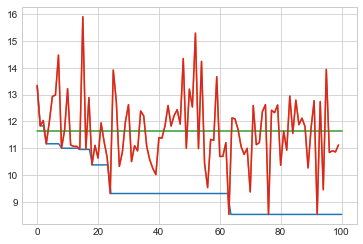

In [36]:
file_url = 'dataset/data.csv'
_file = file_url.strip(".csv")
file_result =  _file + '_Result_ACO.csv'
df = pd.read_csv(file_url)

_job = df.groupby('cluster')['tracking_id'].count().sort_values(ascending=[False])
print(_job)
# print(len(_job))
print()

# max_capacity = 0
# for nc in range(len(_job)):
#     if _job[nc] > max_capacity:
#         max_capacity = _job[nc]
        
# df1 = df[['lat', 'lng']]
# print(len(df1), " data processing ... ") 
# print()

# depot_lat = 2.971718
# depot_lng = 101.608376
# depot = 0

# _data = df[['lat', 'lng']]    
# _data.loc[-1] = [depot_lng, depot_lat]  # adding a row
# _data.index = _data.index + 1  # shifting index
# _data.sort_index(inplace=True) 

# df1 = _data[['lng', 'lat']]
# problem = np.array(df1)

distance = []
for i in range(len(_data)):
    lat = _data.iloc[i]['lat']
    lng = _data.iloc[i]['lng']
    from_node = (lng, lat)
    result = []
    for j in range(len(_data)):
        lat = _data.iloc[j]['lat']
        lng = _data.iloc[j]['lng']
        to_node = (lng, lat)
        if i == 0:
            dist = 0
        elif j == 0:
            dist = 0
        else:
            dist = round(haversine(from_node, to_node, unit=Unit.METERS) * 2)
        result.append(dist/1000)
    distance.append(result)
    
print(distance) 
print()



nk = 5  # number of k = ants
maxIterations = 100
beta =  4  # Heuristic constant
zeta = 0.4 # local Pheromone decay   
rho = 0.2  # global Pheromone decay
q0 = 0.7   # randomnize
plot=False
verbose = False

optimizer = ACO()

best_paths, result = optimizer.Fit(distance, nk, maxIterations, beta, zeta, rho, q0, plot, verbose)
optimizer.Plot()



# convert into list New order
# -------
_newCluster = [0] * len(df)
_newOrder = [0] * len(df)

_order = 1
for o in range(len(best_paths)):
    if o > 0:
        pos = best_paths[o]

        _newCluster[pos-1] = 0
        _newOrder[pos-1] = _order
        if verbose:
            print(o, pos)
            print(_newCluster)
            print(_newOrder)

        _order += 1

# print(_newCluster)
# print(_newOrder)
df['New Cluster'] = _newCluster
df['New Order'] = _newOrder
print("Result was saving ... ", file_result)
df.to_csv(file_result, index=False)  
